# Proyecto modulo 2 - Integración montecarlo

In [2]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import random 
import pandas as pd
%matplotlib inline

Definimos nuestra funcion montecarlo tipo 1

In [3]:
def montecarlo1(f,a,b,N):
    u=np.random.uniform(a,b,size=N)
    return np.mean(f(u)*(b-a))

### Primera integral

Primera funcion a integrar - Calores especificos [Cp]

In [4]:
def f1(x):
    return(8.3145*(3.374 + 27.257*(10**-3)*x - 1.917*(10**-5)*x**2 - 0.616*(10**-8)*x**3 + 0.859*(10**-11)*x**4))

Realizamos la integral de los Cp

In [5]:
#Definimos el numero de N a evaluar
N=10000

#Definimos el rango a evaluar
a=298 #Primer valor Temperatura/Limite inferior
b=np.linspace(300,1000,num=701) #Segundo valor Temperatura/Limite superior
H1=57200 #Entalpia a 298

#Creamos la tabla
tabla=pd.DataFrame()

#Ciclo for para evaluar las integrales
for i in b:  
    tabla.loc[i,"Cp"]=montecarlo1(f1,a,i,int(N)) #Valores de los Cp´s
    tabla.loc[i,"Entalpias"]=tabla.loc[i,"Cp"]+H1 #Valores de las entalpias de acuerdo a b
    
tabla

,Cp,Entalpias
300.0,161.535788,57361.535788
301.0,242.490966,57442.490966
302.0,323.570987,57523.570987
303.0,404.755774,57604.755774
304.0,486.076112,57686.076112
...,...,...
996.0,72237.355228,129437.355228
997.0,72435.546286,129635.546286
998.0,72446.018289,129646.018289
999.0,72510.352601,129710.352601


Graficamos las entalpias

Text(0, 0.5, 'Entalpia')

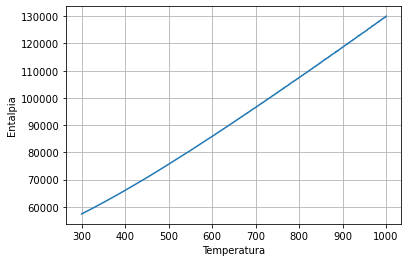

In [6]:
tabla["Entalpias"].plot(grid=True)
plt.xlabel('Temperatura')
plt.ylabel('Entalpia')

Ya con el valor de las entalpias encontramos las constantes de equilibrio

### Segunda integral

Extraemos el vector que nos importa de la tabla anterior

In [7]:
Entalpias=np.asarray(tabla["Entalpias"])

Segunda funcion a integrar - Constantes de equilibrio [Ke]

In [8]:
def f2(Entalpias,x,b):
    R=8.31446
    return(Entalpias[int(b-300)]/(R*x**2))

Modificamos nuestra funcion montecarlo tipo 1

In [9]:
def montecarlo1_1(f,Entalpias,a,b,N):
    u=np.random.uniform(a,b,size=N)
    return np.mean(f(Entalpias,u,b)*(b-a))

Realizamos la integral de las constantes de equilibrio

In [10]:
#Definimos el numero de N a evaluar
N=100000

#Definimos el rango a evaluar
a=298 #Primer valor Temperatura/Limite inferior
b=np.linspace(300,1000,num=701) #Segundo valor Temperatura/Limite superior
K1=0.148 #Constante de equilibrio a 298


#Ciclo for para evaluar las integrales
for i in b:  
    tabla.loc[i,"Constantes de equilibrio"]=K1*np.e**montecarlo1_1(f2,Entalpias,a,i,int(N)) #Valores con las constantes de equilibrio
    
tabla

,Cp,Entalpias,Constantes de equilibrio
300.0,161.535788,57361.535788,1.726988e-01
301.0,242.490966,57442.490966,1.864730e-01
302.0,323.570987,57523.570987,2.012863e-01
303.0,404.755774,57604.755774,2.172092e-01
304.0,486.076112,57686.076112,2.343311e-01
...,...,...,...
996.0,72237.355228,129437.355228,1.173735e+15
997.0,72435.546286,129635.546286,1.335450e+15
998.0,72446.018289,129646.018289,1.340016e+15
999.0,72510.352601,129710.352601,1.355083e+15


Graficamos las constantes de equilibrio

Text(0, 0.5, 'Constante de equilibrio')

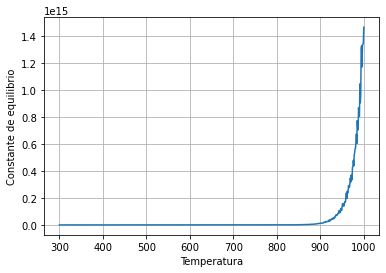

In [11]:
tabla["Constantes de equilibrio"].plot(grid=True)
plt.xlabel('Temperatura')
plt.ylabel('Constante de equilibrio')